In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('millas-por-galon.csv', index_col=0)

In [4]:
df.head()

,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
cylinders,,,,,,,,
discrete,continuous,continuous,continuous,continuous,discrete,discrete,continuous,string
NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite


Analisis Exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, discrete to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   displacement  399 non-null    object
 1   horsepower    393 non-null    object
 2   weight        399 non-null    object
 3   acceleration  399 non-null    object
 4   model year    399 non-null    object
 5   origin        399 non-null    object
 6   mpg           400 non-null    object
 7   car name      400 non-null    object
dtypes: object(8)
memory usage: 28.1+ KB


Se ve los nulos

In [6]:
df.isnull().sum()

displacement    1
horsepower      7
weight          1
acceleration    1
model year      1
origin          1
mpg             0
car name        0
dtype: int64

In [7]:
df.duplicated().sum()

0

Se eliminan las vacias 

In [8]:
df=df.dropna(subset=["horsepower"])
df

,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
cylinders,,,,,,,,
discrete,continuous,continuous,continuous,continuous,discrete,discrete,continuous,string
8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
...,...,...,...,...,...,...,...,...
4,140.0,86.0,2790.0,15.6,82,1,27.0,ford mustang gl
4,97.0,52.0,2130.0,24.6,82,2,44.0,vw pickup
4,135.0,84.0,2295.0,11.6,82,1,32.0,dodge rampage


Se elimina la primera fila porque no aporta nada a la dataset

In [9]:
df=df.drop(df.index[0])
df

,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
cylinders,,,,,,,,
8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
8,302.0,140.0,3449.0,10.5,70,1,17.0,ford torino
...,...,...,...,...,...,...,...,...
4,140.0,86.0,2790.0,15.6,82,1,27.0,ford mustang gl
4,97.0,52.0,2130.0,24.6,82,2,44.0,vw pickup
4,135.0,84.0,2295.0,11.6,82,1,32.0,dodge rampage


## Hipótesis de Trabajo variable horsepower
"El Rendimiento de un autmovil  depende de su horsepower, y tiene una relación lineal."

Se elabora un nuevo dataframe con los valores requeridos para el posterior cálculo

In [11]:


h1 = pd.DataFrame({'horsepower':df['horsepower'],'mpg':df['mpg']})
h1

,horsepower,mpg
cylinders,,
8,130.0,18.0
8,165.0,15.0
8,150.0,18.0
8,150.0,16.0
8,140.0,17.0
...,...,...
4,86.0,27.0
4,52.0,44.0
4,84.0,32.0


In [35]:
h2 = h1.apply(pd.to_numeric, errors='coerce')

### Diagrama de dispersión

<Axes: xlabel='horsepower', ylabel='mpg'>

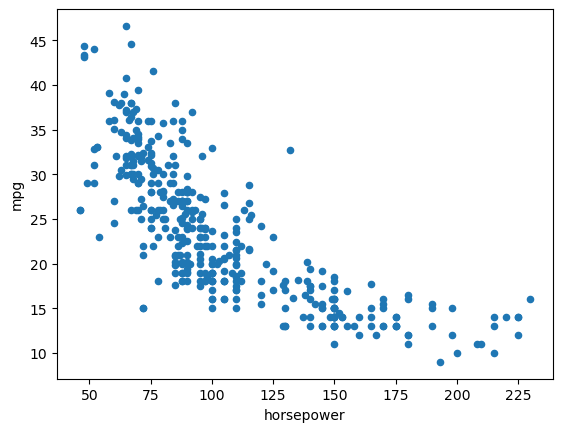

In [34]:
h2.plot.scatter('horsepower','mpg')

Se puede apreciar una relación   entre horsepower y mpg. Mientras mayor sea el horsepower(caballos de fuerza) menor será el rendimiento. Aunque  si el horsepower fuera mas de 225 implicaria un mpg negativo, lo cual no tiene sentido. Por lo que la relación lineal no es la adecuada.

In [14]:
h2.mean()

horsepower    104.469388
mpg            23.445918
dtype: float64

In [15]:
h2.corr()

,horsepower,mpg
horsepower,1.000000,-0.778427
mpg,-0.778427,1.000000


Se puede ver que hay una correlación negativa alta.

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(data=h2, formula="mpg ~ horsepower").fit()

### Diagrama de dispersión

<Axes: xlabel='horsepower', ylabel='mpg'>

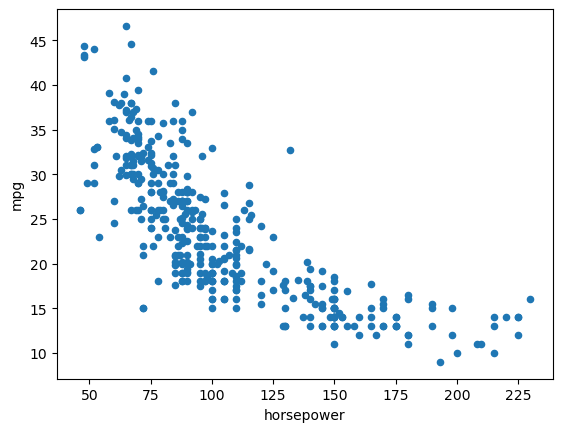

In [34]:
h2.plot.scatter('horsepower','mpg')

Se puede apreciar una relación   entre horsepower y mpg. Mientras mayor sea el horsepower(caballos de fuerza) menor será el rendimiento. Aunque  si el horsepower fuera mas de 225 implicaria un mpg negativo, lo cual no tiene sentido. Por lo que la relación lineal no es la adecuada.

In [14]:
h2.mean()

horsepower    104.469388
mpg            23.445918
dtype: float64

In [15]:
h2.corr()

,horsepower,mpg
horsepower,1.000000,-0.778427
mpg,-0.778427,1.000000


Se puede ver que hay una correlación negativa alta.

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(data=h2, formula="mpg ~ horsepower").fit()

In [18]:
lm.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           7.03e-81
Time:                        11:46:05   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Realizando Predicciones

In [21]:
(h2['mpg'].min(),h2['mpg'].max())

(9.0, 46.6)

In [27]:
(h2['horsepower'].min(),h2['horsepower'].max())

(46.0, 230.0)

In [37]:
x = pd.DataFrame([50, 90, 130, 170, 210], columns=['horsepower'])
x

,horsepower
0,50
1,90
2,130
3,170
4,210


In [38]:
lm.predict(x)

0    32.043624
1    25.729835
2    19.416046
3    13.102256
4     6.788467
dtype: float64

### Inspeccionando los resultados

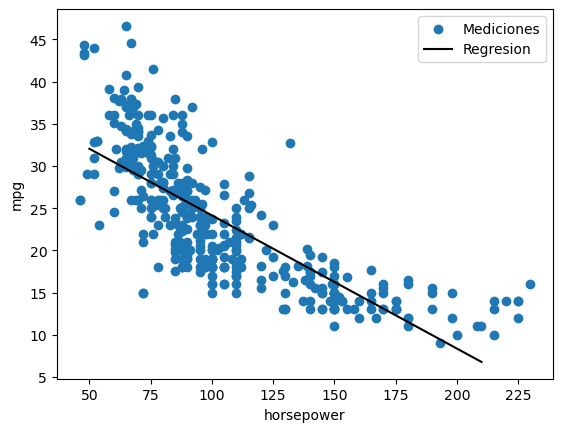

In [40]:
plt.scatter(h2['horsepower'], h2['mpg'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend(loc=0)

### Análisis de Residuales

<Axes: ylabel='Density'>

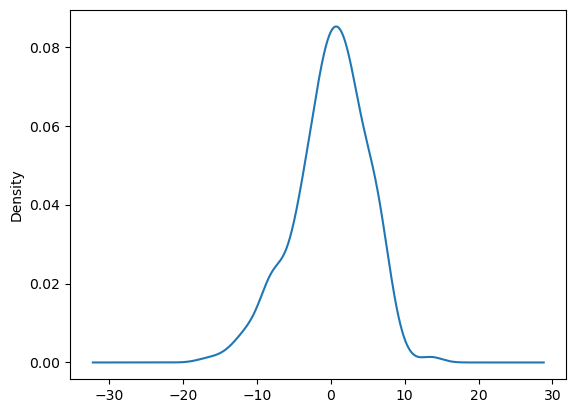

In [43]:
y_pred = lm.predict(h2['horsepower'])
y_true = h2['mpg']
(y_pred - y_true).plot(kind='kde')

Si bien parece una distribución normal o se le asemeja, no lo es. Por lo que el supuesto de normalidad no esta, por ende el modelo no es adecuado para los datos.

### Métricas de Evaluación del Modelo

In [44]:
import statsmodels.tools.eval_measures as metrics

In [45]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

3.8275871459582222

In [46]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

23.943662938603108

In [47]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

4.893226230065713

In [48]:
# r2
lm.rsquared

0.6059482578894348

El 60,6% de la varianza de horsepower explica la varianza del mpg

## Hipótesis de Trabajo variable weight
"El Rendimiento de un autmovil  depende de su weight(peso), y tiene una relación lineal."

In [50]:
h3=pd.DataFrame({'weight':df['weight'],'mpg':df['mpg']})

,weight,mpg
cylinders,,
8,3504.0,18.0
8,3693.0,15.0
8,3436.0,18.0
8,3433.0,16.0
8,3449.0,17.0
...,...,...
4,2790.0,27.0
4,2130.0,44.0
4,2295.0,32.0


In [52]:
h3 = h3.apply(pd.to_numeric, errors='coerce')
h3

,weight,mpg
cylinders,,
8,3504.0,18.0
8,3693.0,15.0
8,3436.0,18.0
8,3433.0,16.0
8,3449.0,17.0
...,...,...
4,2790.0,27.0
4,2130.0,44.0
4,2295.0,32.0


### Diagrama de dispersión

<Axes: xlabel='weight', ylabel='mpg'>

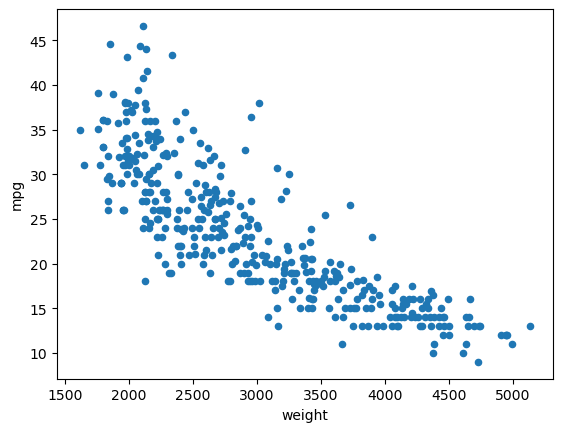

In [53]:
h3.plot.scatter('weight','mpg')

Se puede apreciar una relación   entre weight y mpg. Mientras mayor sea el weight(peso) menor será el rendimiento. Aunque  si el horsepower fuera mas de 5000 implicaria un mpg negativo, lo cual no tiene sentido. Por lo que la relación lineal no es la adecuada.

In [54]:
h3.mean()

weight    2977.584184
mpg         23.445918
dtype: float64

In [55]:
h3.corr()

,weight,mpg
weight,1.000000,-0.832244
mpg,-0.832244,1.000000


Se puede ver que hay una correlación negativa alta y es mayor que la que tenia con horsepower.

### Hipótesis de Trabajo

"El Rendimiento(mpg) de un vehiculo depende de su peso(weight) y tiene una relación lineal."

In [56]:
import statsmodels.formula.api as smf
lm = smf.ols(data=h3, formula="mpg ~ weight").fit()

In [57]:
lm.params

Intercept    46.216525
weight       -0.007647
dtype: float64

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          6.02e-102
Time:                        12:31:29   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizando Predicciones

In [59]:
x = pd.DataFrame([1500, 2200, 2900, 3600, 4300], columns=['weight'])
x

,weight
0,1500
1,2200
2,2900
3,3600
4,4300


In [60]:
lm.predict(x)

0    34.745511
1    29.392371
2    24.039231
3    18.686091
4    13.332952
dtype: float64

### Inspeccionando los resultados

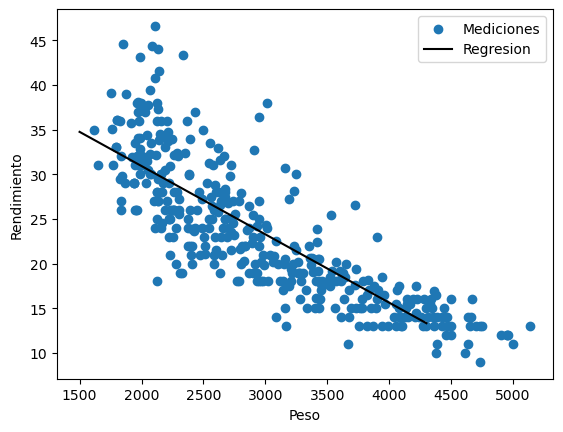

In [61]:
plt.scatter(h3['weight'], h3['mpg'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('Peso')
plt.ylabel('Rendimiento')
plt.legend(loc=0)

### Análisis de Residuales

<Axes: ylabel='Density'>

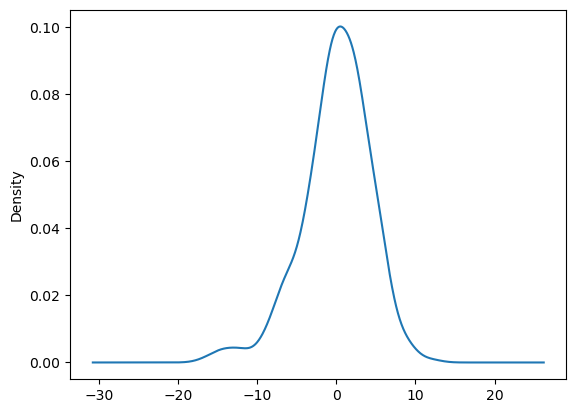

In [62]:
y_pred = lm.predict(h3['weight'])
y_true = h3['mpg']
(y_pred - y_true).plot(kind='kde')

Si bien parece una distribución normal o se le asemeja, no lo es. Por lo que el supuesto de normalidad no esta, por ende el modelo no es adecuado para los datos.

### Métricas de Evaluación del Modelo

In [63]:
import statsmodels.tools.eval_measures as metrics

In [64]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

3.278702411511849

In [65]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

18.6766165974193

In [66]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

4.321645126270701

In [67]:
# r2
lm.rsquared

0.6926304331206254

El 69,26% de la varianza de horsepower explica la varianza del mpg

## Hipótesis de Trabajo variable acceleration
"El Rendimiento de un autmovil  depende de su acceleration(aceleeración), y tiene una relación lineal."

In [68]:
h4=pd.DataFrame({'acceleration':df['acceleration'],'mpg':df['mpg']})

In [70]:
h4 = h4.apply(pd.to_numeric, errors='coerce')
h4

,acceleration,mpg
cylinders,,
8,12.0,18.0
8,11.5,15.0
8,11.0,18.0
8,12.0,16.0
8,10.5,17.0
...,...,...
4,15.6,27.0
4,24.6,44.0
4,11.6,32.0


### Diagrama de dispersión

<Axes: xlabel='acceleration', ylabel='mpg'>

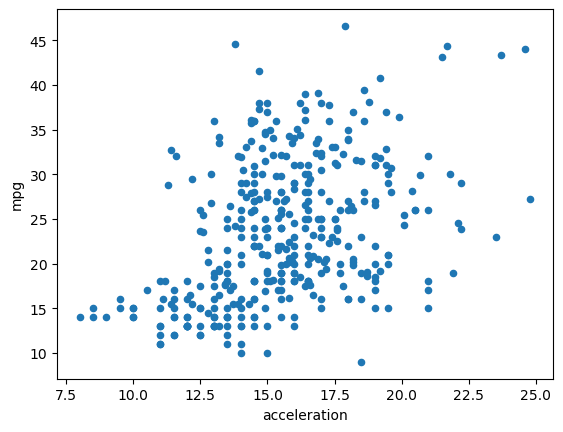

In [71]:
h4.plot.scatter('acceleration','mpg')

Se puede apreciar una leve relación positiva entre acceleration y mpg. Mientras mayor sea la aceleración mayor será el rendimiento. 

In [72]:
h4.mean()

acceleration    15.541327
mpg             23.445918
dtype: float64

In [73]:
h4.corr()

,acceleration,mpg
acceleration,1.000000,0.423329
mpg,0.423329,1.000000


Se puede ver que hay una correlación positiva media entre accelaration y mpg.

In [74]:
import statsmodels.formula.api as smf
lm = smf.ols(data=h4, formula="mpg ~ acceleration").fit()

In [75]:
lm.params

Intercept       4.833250
acceleration    1.197624
dtype: float64

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.78e-18
Time:                        13:12:28   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Realizando Predicciones

In [77]:
x = pd.DataFrame([8, 12, 16, 20, 24], columns=['acceleration'])
x

,acceleration
0,8
1,12
2,16
3,20
4,24


In [78]:
lm.predict(x)

0    14.414243
1    19.204740
2    23.995237
3    28.785734
4    33.576230
dtype: float64

### Inspeccionando los resultados

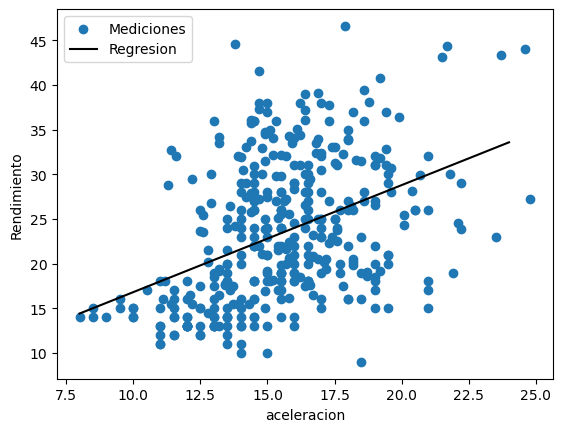

In [79]:
plt.scatter(h4['acceleration'], h4['mpg'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('aceleracion')
plt.ylabel('Rendimiento')
plt.legend(loc=0)

### Análisis de Residuales

<Axes: ylabel='Density'>

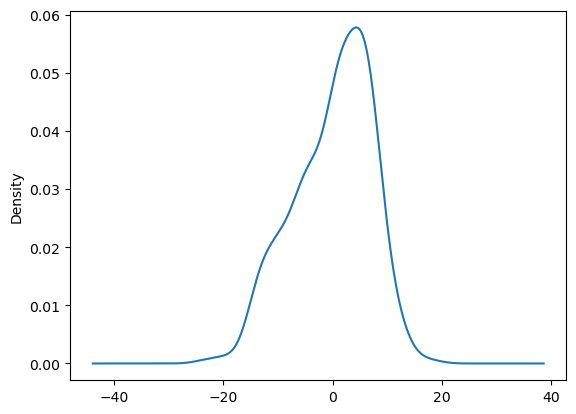

In [80]:
y_pred = lm.predict(h4['acceleration'])
y_true = h4['mpg']
(y_pred - y_true).plot(kind='kde')

Si bien parece una distribución normal o se le asemeja, no lo es. Por lo que el supuesto de normalidad no esta, por ende el modelo no es adecuado para los datos.

### Métricas de Evaluación del Modelo

In [81]:
import statsmodels.tools.eval_measures as metrics

In [82]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

5.795118114287833

In [83]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

49.87362732665226

In [84]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

7.062126261024527

In [85]:
# r2
lm.rsquared

0.1792070501562547

El 17,92 % de la varianza de accelaration explica la varianza del mpg

In [ ]:
Por lo tanto, de las tres variables la que tiene mayor incidencia en el rendimiento sería el peso. Dado que presenta una correlación más alta que las otras.
Cabe aclarar que sería tendría un límite dado que no podría haber un rendimiento negativo.